![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 3.2 The Weibull Model for Survival Analysis


This tutorial demonstrates how to fit and interpret a Weibull model for survival analysis in Python using the `lifelines` library. The Weibull model is a flexible parametric model that allows for increasing, decreasing, or constant hazard rates, making it more versatile than the exponential model.


## Overview


The Weibull model is a versatile parametric model in survival analysis, capable of modeling increasing, decreasing, or constant hazard rates. Below, I derive the key mathematical functions for the Weibull distribution—**probability density function (PDF)**, **survival function**, **hazard function**, and **cumulative hazard function**—starting from first principles. I’ll keep the derivation clear and concise, focusing on the standard two-parameter Weibull distribution commonly used in survival analysis.


### Parameters

The Weibull distribution is characterized by two parameters:

- $\lambda > 0$: **Scale parameter**, related to the characteristic life or spread of the distribution.
- $(p > 0$: **Shape parameter**, which determines the behavior of the hazard function:
  - $p > 1$: Increasing hazard (e.g., aging systems).
  - $p < 1$: Decreasing hazard (e.g., early failures).
  - $p = 1$: Constant hazard (reduces to the exponential model).

The random variable $T$ represents the survival time ($T\geq 0$).


### Probability Density Function (PDF)


The PDF, $f(t)$, describes the probability density of the event occurring at time $t$.

**Derivation**:

The Weibull PDF is defined as:

$$
f(t) = p \lambda^p t^{p-1} e^{-(\lambda t)^p}, \quad t \geq 0, \quad \lambda, p > 0
$$

- **Origin**: The Weibull distribution generalizes the exponential distribution. For the exponential ($p = 1$), the PDF is $f(t) = \lambda e^{-\lambda t}$. The Weibull introduces the shape parameter $p$, which modifies the time scale via $t^{p-1}$ and the exponential term via $(\lambda t)^p$.

- **Normalization**: To ensure $f(t)$ is a valid PDF, it must integrate to 1 over $[0, \infty)$:

$$
  \int_0^\infty f(t) \, dt = \int_0^\infty p \lambda^p t^{p-1} e^{-(\lambda t)^p} \, dt
$$
  Substitute $u = (\lambda t)^p$, so $t = u^{1/p} / \lambda$, $dt = \frac{1}{p} \lambda^{-1} u^{1/p - 1} \, du$:

$$
  \int_0^\infty p \lambda^p \left(\frac{u^{1/p}}{\lambda}\right)^{p-1} e^{-u} \cdot \frac{1}{p} \lambda^{-1} u^{1/p - 1} \, du
$$
  Simplify:
$$
  = \int_0^\infty p \lambda^p \cdot \lambda^{1-p} u^{(p-1)/p} \cdot \frac{1}{p} \lambda^{-1} u^{1/p - 1} e^{-u} \, du
  = \int_0^\infty \lambda^{p - (p-1) - 1} u^{(p-1)/p + 1/p - 1} e^{-u} \, du
  = \int_0^\infty e^{-u} \, du = 1
$$
  This confirms the PDF is properly normalized.


### Survival Function


The survival function, $S(t) = P(T > t)$, is the probability of surviving past time $t$. It is derived from the cumulative distribution function (CDF), $F(t) = P(T \leq t)$.

**Derivation**:

The CDF is the integral of the PDF:

$$
F(t) = \int_0^t f(u) \, du = \int_0^t p \lambda^p u^{p-1} e^{-(\lambda u)^p} \, du
$$
Using the same substitution as above, $v = (\lambda u)^p$, $u = v^{1/p} / \lambda$, $du = \frac{1}{p} \lambda^{-1} v^{1/p - 1} \, dv$:

$$
F(t) = \int_0^{(\lambda t)^p} p \lambda^p \left(\frac{v^{1/p}}{\lambda}\right)^{p-1} e^{-v} \cdot \frac{1}{p} \lambda^{-1} v^{1/p - 1} \, dv
= \int_0^{(\lambda t)^p} e^{-v} \, dv = \left[ -e^{-v} \right]_0^{(\lambda t)^p} = 1 - e^{-(\lambda t)^p}
$$
Thus, the survival function is:
$$
S(t) = 1 - F(t) = e^{-(\lambda t)^p}
$$
- **Properties**:

  - $S(0) = e^0 = 1$ (100% survival at $t = 0$).
  
  - As $t \to \infty$, $S(t) \to 0$.
  
  - When $p = 1$, $S(t) = e^{-\lambda t}$, recovering the exponential survival function.


### Hazard Function


The hazard function, $h(t)$, is the instantaneous rate of the event occurring at time $t$, given survival up to $t$. It is defined as:

$$
h(t) = \frac{f(t)}{S(t)}
$$

**Derivation**:
Using the PDF and survival function:

$$
h(t) = \frac{p \lambda^p t^{p-1} e^{-(\lambda t)^p}}{e^{-(\lambda t)^p}} = p \lambda^p t^{p-1}
$$
Simplify:

$$
h(t) = p \lambda^p t^{p-1} = \lambda p (\lambda t)^{p-1}
$$
- **Properties**:

  - The hazard depends on $t^{p-1}$:
  
    - If $p > 1$, $h(t)$ increases with time (e.g., wear-out failures).
    
    - If $p < 1$, $h(t)$ decreases (e.g., early failures).
    
    - If $p = 1$, $h(t) = \lambda$, constant (exponential model).
    
  - The term $\lambda^p$ scales the hazard, and $p$ shapes its time dependency.


###  Cumulative Hazard Function


The cumulative hazard function, $H(t)$, is the integral of the hazard function over time:

$$
H(t) = \int_0^t h(u) \, du
$$

**Derivation**:

$$
h(u) = p \lambda^p u^{p-1}
$$
Integrate:

$$
H(t) = \int_0^t p \lambda^p u^{p-1} \, du = \lambda^p \left[ u^p \right]_0^t = \lambda^p t^p = (\lambda t)^p
$$

- **Relationship to Survival**: The survival function can be expressed as:

$$
S(t) = e^{-H(t)} = e^{-(\lambda t)^p}
$$
  This confirms consistency across the functions.


### Summary of Weibull Functions


- **PDF**: $f(t) = p \lambda^p t^{p-1} e^{-(\lambda t)^p}$
- **Survival Function**: $S(t) = e^{-(\lambda t)^p}$
- **Hazard Function**: $h(t) = p \lambda^p t^{p-1} = \lambda p (\lambda t)^{p-1}$
- **Cumulative Hazard**: $H(t) = (\lambda t)^p$


### Additional Notes


- **Mean and Variance**:

  - Mean: $E[T] = \lambda^{-1} \Gamma(1 + 1/p)$, where $\Gamma$ is the gamma function.
  
  - Variance: $\text{Var}(T) = \lambda^{-2} \left[ \Gamma(1 + 2/p) - \Gamma(1 + 1/p)^2 \right]$.
  
- **Special Case**: When $p = 1$, the Weibull reduces to the exponential model ($f(t) = \lambda e^{-\lambda t}$, $S(t) = e^{-\lambda t}$, $h(t) = \lambda$.

- **Practical Use**: In R’s `survreg` (from the `survival` package), the Weibull model is fit with `dist = "weibull"`. The scale parameter is $\lambda = \exp(-\text{Intercept}/\text{scale})$, and the shape parameter is $p = 1/\text{scale}$.

- **Flexibility**: The Weibull’s ability to model non-constant hazards makes it widely applicable in reliability engineering, medical survival analysis, and more.

These derivations show how the Weibull functions are interconnected, with the shape parameter \(p\) providing flexibility over the exponential model.



## Cheeck and Load Required Packages

In [1]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name
    
    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'lifelines']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
lifelines is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✓ lifelines


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import WeibullFitter, KaplanMeierFitter
from lifelines.utils import survival_table_from_events
from lifelines.plotting import plot_lifetimes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-v0_8')

## Implementation in Python

### Data

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/lung_dataset.csv"
lung_data = pd.read_csv(url)

### Preparing the Data

In [4]:
# Create working copy
data = lung_data.copy()

# Preprocessing
# Original: sex: 1=male, 2=female → convert to 0=male, 1=female
data['sex'] = data['sex'].map({1: 0, 2: 1})
data['sex'] = data['sex'].astype('category')
data['sex_name'] = data['sex'].map({0: 'Male', 1: 'Female'})

# Handle missing values in ECOG performance score (ph.ecog)
data['ph.ecog'].fillna(data['ph.ecog'].median(), inplace=True)

# Event indicator: status == 1 → death (event), status == 2 → censored
data['event'] = (data['status'] == 1).astype(int)

# Select key variables
df = data[['time', 'event', 'age', 'sex', 'wt.loss', 'ph.ecog']].copy()

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nEvent rate:", df['event'].mean().round(3))

Dataset shape: (228, 6)

First 5 rows:
   time  event  age sex  wt.loss  ph.ecog
0   306      0   74   0      NaN      1.0
1   455      0   68   0     15.0      0.0
2  1010      1   56   0     15.0      0.0
3   210      0   57   0     11.0      1.0
4   883      0   60   0      0.0      0.0

Event rate: 0.276


### Fitting the Weibull Model


The Weibull model is fit using `survreg()` with `dist = "weibull"`. The Weibull model can be parameterized as an Accelerated Failure Time (AFT) model, where the survival time follows a Weibull distribution. The model estimates a scale parameter ($\lambda$) and a shape 

| Function | Formula | Behavior based on shape $p$ |
|----|----|----|
| Survival $S(t)$ | $\exp(-(\\lambda t)\^p)$ |  |
| PDF $f(t)$ | $p\lambda^p t^{p-1}\exp(-(\lambda t)^p)$ |  |
| Hazard $h(t)$ | $p\lambda^p t^{p-1}$ | $p>1$: increasing |





parameter ($p$), where:

- $p > 1$: Increasing hazard rate.
- $p < 1$: Decreasing hazard rate.
- $p = 1$: Constant hazard (equivalent to exponential).


### Without Covariates (Intercept-Only Model)


Fit a basic Weibull model to estimate baseline survival.


In [5]:
# Initialize and fit the Weibull model
wbf = WeibullFitter()
wbf.fit(durations=df['time'], event_observed=df['event'])
# Summary
wbf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 228 total observations, 165 right-censored observations>
   number of observations = 228
number of events observed = 63
           log-likelihood = -483.53
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 705.13     48.58          609.92          800.35
rho_      2.00      0.18            1.65            2.35

         cmp to     z      p  -log2(p)
lambda_    1.00 14.49 <0.005    155.73
rho_       1.00  5.57 <0.005     25.20
---
AIC = 971.06


**Output interpretation**:

- **Intercept**: Log of the scale parameter ($log(\lambda)$).

- **Log(scale)**: Related to the shape parameter ($p = 1 / \text{scale}$). If $\log(\text{scale}) < 0$, then $p > 1$, indicating an increasing hazard.

- **Hazard function**: $h(t) = \lambda p (\lambda t)^{p-1}$, where $\lambda = \exp(-\text{Intercept}/\text{scale})$.

- **Survival function**: $S(t) = \exp(-(\lambda t)^p)$.


In [6]:
print(f"Shape parameter (rho): {wbf.rho_:.3f}")
print(f"Scale parameter (lambda): {wbf.lambda_:.2f}")

if wbf.rho_ > 1:
    print("Hazard is INCREASING over time (aging process)")
elif wbf.rho_ < 1:
    print("Hazard is DECREASING over time (early failures dominate)")
else:
    print("Hazard is roughly constant (exponential-like)")

Shape parameter (rho): 1.999
Scale parameter (lambda): 705.13
Hazard is INCREASING over time (aging process)


### Plot Survival and Hazard Functions

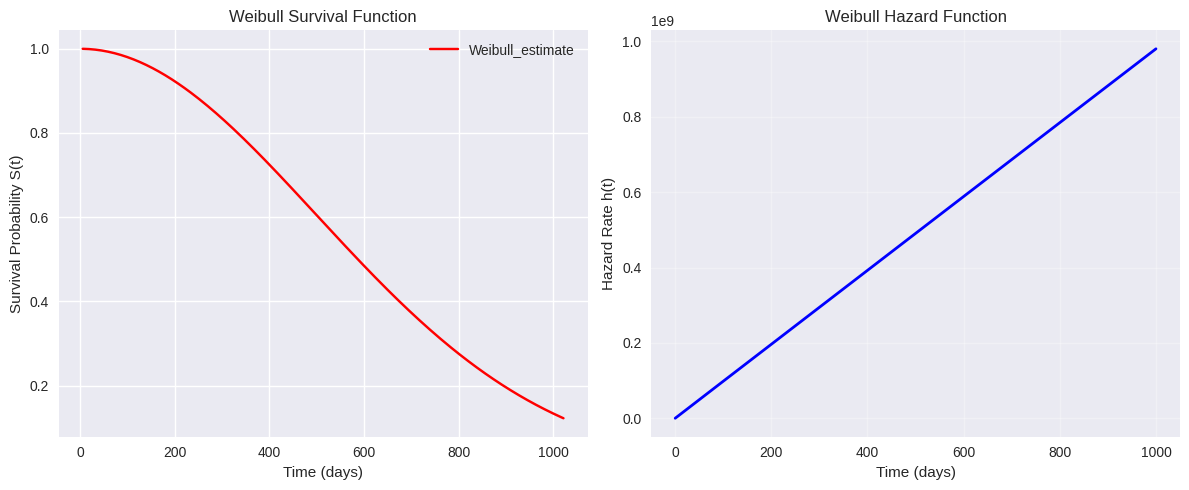

In [7]:
Pythonfig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Survival curve
wbf.survival_function_.plot(ax=axes[0], color='red')
axes[0].set_title('Weibull Survival Function')
axes[0].set_xlabel('Time (days)')
axes[0].set_ylabel('Survival Probability S(t)')

# Hazard function
t = np.linspace(0.1, 1000, 500)
hazard = wbf.lambda_**wbf.rho_ * wbf.rho_ * t**(wbf.rho_ - 1)
axes[1].plot(t, hazard, color='blue', lw=2)
axes[1].set_title('Weibull Hazard Function')
axes[1].set_xlabel('Time (days)')
axes[1].set_ylabel('Hazard Rate h(t)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Compare with Kaplan-Meier (Non-parametric)

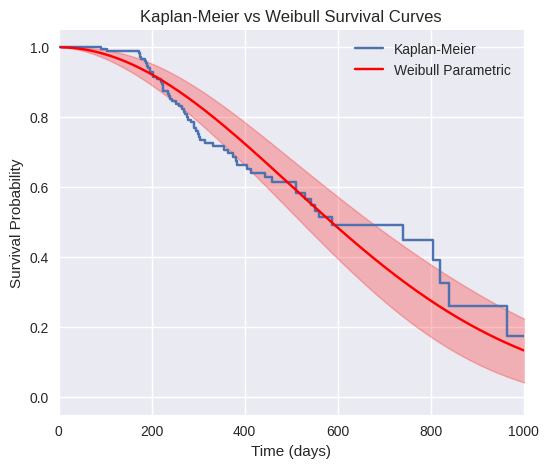

In [8]:
kmf = KaplanMeierFitter()

plt.figure(figsize=(6, 5))
kmf.fit(durations=df['time'], event_observed=df['event'], label='Kaplan-Meier')
kmf.plot_survival_function(ci_show=False)

wbf.plot_survival_function(label='Weibull Parametric', color='red')

plt.title('Kaplan-Meier vs Weibull Survival Curves')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.xlim(0, 1000)
plt.show()

### Weibull AFT Model with Covariates (Regression)

Use `WeibullAFTFitter` for Accelerated Failure Time model with predictors. Include covariates like `age` and `sex` (1 = male, 2 = female) to model their effect on survival time.

In [9]:
from lifelines import WeibullAFTFitter

# Prepare data
df_reg = df.copy()
df_reg['sex'] = df_reg['sex'].astype(float)  # lifelines prefers numeric

# Impute missing values for covariates used in the model (avoid NaNs)
# Here we impute 'wt.loss' with its median. Adjust if you prefer another strategy.
if df_reg['wt.loss'].isnull().any():
    median_wt = df_reg['wt.loss'].median()
    df_reg['wt.loss'].fillna(median_wt, inplace=True)
    print(f"Filled missing wt.loss with median = {median_wt}")

# If any other critical columns still contain NaNs, drop those rows
critical_cols = ['time', 'event', 'age', 'sex', 'ph.ecog', 'wt.loss']
if df_reg[critical_cols].isnull().any().any():
    before = df_reg.shape[0]
    df_reg = df_reg.dropna(subset=critical_cols)
    after = df_reg.shape[0]
    print(f"Dropped {before-after} rows with remaining missing critical values")

# Fit AFT model
aft = WeibullAFTFitter()
aft.fit(df_reg, duration_col='time', event_col='event', 
        formula="age + sex + ph.ecog + wt.loss")

aft.print_summary()

Filled missing wt.loss with median = 7.0


<lifelines.WeibullAFTFitter: fitted with 228 total observations, 165 right-censored observations>
             duration col = 'time'
                event col = 'event'
   number of observations = 228
number of events observed = 63
           log-likelihood = -479.15
         time fit was run = 2025-12-03 01:18:49 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ Intercept  6.10    446.00      0.46            5.20            7.00              180.72             1100.73
        age        0.01      1.01      0.01           -0.01            0.02                0.99                1.02
        sex       -0.29      0.75      0.13           -0.55           -0.03                0.58                0.97
        ph.ecog    0.13      1.14      0.11           -0.08            0.35                0.92                1.41
        wt.loss    0.00      1.00      0.01           -0.01            0.01                0.99                1.01
rho_    Intercept  0.69      1.99      0.09            0.51            0.87                1.66                2.38

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ Intercept    0.00 13.23 <0.005    130.41
        age          0.00  1.11   0.27      1.90
        sex          0.00 -2.19   0.03      5.13
        ph.ecog      0.00  1.23   0.22      2.20
        wt.loss      0.00  0.10   0.92      0.11
rho_    Intercept    0.00  7.52 <0.005     44.01
---
Concordance = 0.58
AIC = 970.29
log-likelihood ratio test = 8.77 on 4 df
-log2(p) of ll-ratio test = 3.90


**Interpretation**:

- Coefficients are on the log-time scale (AFT model). A positive coefficient increases survival time (decreases hazard).

- For example, a positive coefficient for `sex` suggests females have longer survival times.

- Hazard ratio for a covariate: $\exp(-\text{coefficient} / \text{scale})$.

- The shape parameter ($p = 1 / \text{scale}$) determines the hazard's behavior over time.

To test model significance:


In [10]:
print(aft.summary[['coef', 'exp(coef)']])

                       coef   exp(coef)
param   covariate                      
lambda_ Intercept  6.100328  446.003835
        age        0.008276    1.008310
        sex       -0.289286    0.748798
        ph.ecog    0.133796    1.143160
        wt.loss    0.000510    1.000510
rho_    Intercept  0.687250    1.988240


### Interpreting the Results

In [12]:
# Extract Weibull shape (rho) robustly (want a scalar)
if hasattr(aft, "rho_"):
    rho = float(aft.rho_)
elif hasattr(aft, "scale_"):
    rho = float(1.0 / aft.scale_)
else:
    # Try to read from aft.summary (handles MultiIndex)
    s = getattr(aft, "summary", None)
    if s is None:
        raise AttributeError(
            "Could not determine Weibull shape parameter 'rho' from the fitted WeibullAFTFitter. "
            "Please update lifelines or compute rho manually."
        )
    # select rows where the first level of the index equals 'rho_' or 'scale'
    idx0 = s.index.get_level_values(0)
    if "rho_" in idx0:
        rho = float(s[idx0 == "rho_"]["coef"].iloc[0])
    elif "scale" in idx0:
        rho = float(1.0 / s[idx0 == "scale"]["coef"].iloc[0])
    else:
        raise RuntimeError("No 'rho_' or 'scale' row found in aft.summary to infer rho")

# Prepare parameters and confidence intervals for the 'lambda_' (coefficients) part
params = aft.params_.squeeze()  # Series or DataFrame -> Series
# If params is MultiIndex (param, covariate), we want the covariate rows for lambda_
if isinstance(params.index, pd.MultiIndex):
    if "lambda_" in params.index.get_level_values(0):
        beta = params.xs("lambda_")
    else:
        # fallback: use whole params (may already be covariate-only)
        beta = params
else:
    beta = params

# Confidence intervals: use iloc to get lower/upper columns, and pick same block ('lambda_') if needed
ci = aft.confidence_intervals_
if isinstance(ci.index, pd.MultiIndex) and "lambda_" in ci.index.get_level_values(0):
    ci_lambda = ci.xs("lambda_")
else:
    ci_lambda = ci

ci_lower = ci_lambda.iloc[:, 0].astype(float)
ci_upper = ci_lambda.iloc[:, 1].astype(float)

# Compute hazard ratios and CI (PH parameterization: exp(-coef / rho))
hr = np.exp(-beta.astype(float) / rho)
hr_ci_lower = np.exp(-ci_lower / rho)
hr_ci_upper = np.exp(-ci_upper / rho)

# Build DataFrame aligned by index
hazard_ratios = pd.DataFrame({
    'HR': hr,
    'Lower 95%': hr_ci_lower,
    'Upper 95%': hr_ci_upper
})

print("\nHazard Ratios (PH parameterization):")
print(hazard_ratios.round(3))


Hazard Ratios (PH parameterization):
              HR  Lower 95%  Upper 95%
covariate                             
Intercept  0.000      0.001      0.000
age        0.988      1.009      0.967
sex        1.523      2.220      1.045
ph.ecog    0.823      1.122      0.604
wt.loss    0.999      1.014      0.984


### Predicted Survival Times


Predict median survival times for individuals.


In [13]:
# For a new patient: 65 yo female, ECOG=1, no weight loss
new_patient = pd.DataFrame({
    'age': [65],
    'sex': [1],      # Female
    'ph.ecog': [1],
    'wt.loss': [0]
})

median_time = aft.predict_median(new_patient)
print(f"Predicted median survival time: {median_time.values[0]:.1f} days")

Predicted median survival time: 543.7 days


### Survival Probabilities


Calculate survival probabilities at specific times.


In [14]:
survival_at_365 = aft.predict_survival_function(new_patient, times=[365])
print(f"Probability of surviving past 1 year: {survival_at_365.values[0][0]:.3f}")

Probability of surviving past 1 year: 0.731


### Plotting and Visualization

#### Survival Curve


Compare the Weibull model to the non-parametric Kaplan-Meier estimate.


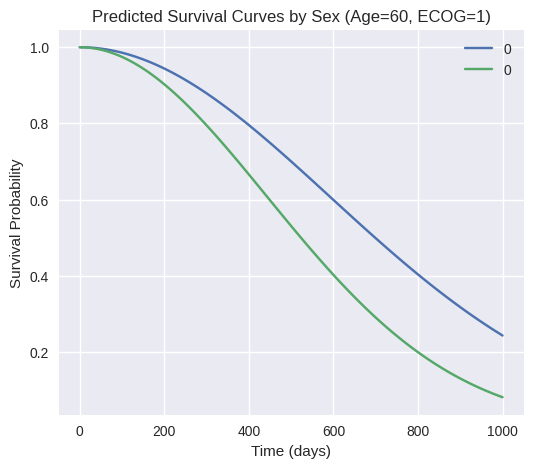

In [16]:
plt.figure(figsize=(6,5))

for sex_val, label in zip([0, 1], ['Male', 'Female']):
    pred_df = pd.DataFrame({
        'age': [60],
        'sex': [sex_val],
        'ph.ecog': [1],
        'wt.loss': [5]
    })
    aft.predict_survival_function(pred_df, times=np.linspace(0, 1000, 100)).plot(
        label=f'{label}', ax=plt.gca()
    )

plt.title('Predicted Survival Curves by Sex (Age=60, ECOG=1)')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


If the Weibull curve closely follows the Kaplan-Meier curve, the model fits well.


#### Diagnostic Plot


Log-Log Plot (Check Weibull Assumption)


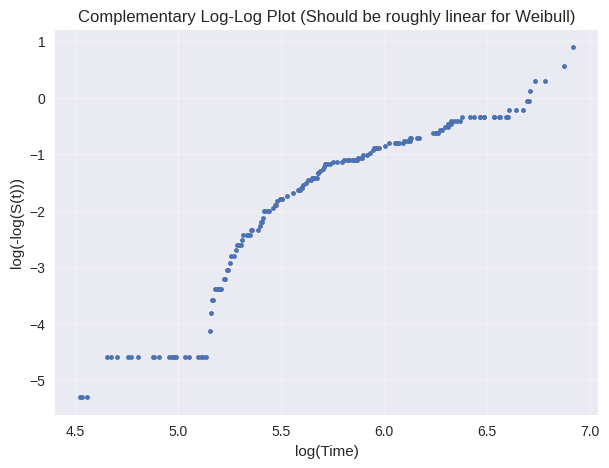

In [17]:
kmf = KaplanMeierFitter()
kmf.fit(df['time'], df['event'])

# Compute complementary log-log
s = kmf.survival_function_
cloglog = np.log(-np.log(s['KM_estimate']))

plt.figure(figsize=(7,5))
plt.plot(np.log(kmf.timeline), cloglog, marker='.', linestyle='none')
plt.title('Complementary Log-Log Plot (Should be roughly linear for Weibull)')
plt.xlabel('log(Time)')
plt.ylabel('log(-log(S(t)))')
plt.grid(True, alpha=0.3)
plt.show()

### Compare Weibull vs Exponential (Likelihood Ratio Test)

In [20]:
from lifelines import ExponentialFitter
from scipy.stats import chi2

expf = ExponentialFitter()
expf.fit(df['time'], df['event'])

print(f"Weibull Log-likelihood: {wbf.log_likelihood_:.2f}")
print(f"Exponential Log-likelihood: {expf.log_likelihood_:.2f}")

# Likelihood ratio test (manual):
# test_stat = 2 * (LL_full - LL_reduced)
# Weibull has one extra parameter (shape) compared to Exponential -> df = 1
ll_w = float(wbf.log_likelihood_)
ll_e = float(expf.log_likelihood_)
test_stat = 2.0 * (ll_w - ll_e)
p_value = chi2.sf(test_stat, df=1)

print(f"LRT statistic: {test_stat:.4f}")
print(f"LRT p-value: {p_value:.4f}")

# Note: Higher (less negative) log-likelihood indicates better fit.

Weibull Log-likelihood: -483.53
Exponential Log-likelihood: -504.46
LRT statistic: 41.8535
LRT p-value: 0.0000


## Summary and Conclusion


The Weibull model is a powerful and flexible tool for survival analysis, capable of modeling various hazard shapes. This tutorial covered:
- Fitting Weibull models with and without covariates 
- Interpreting model parameters, including the shape and scale.
- Making predictions for survival times and probabilities.
- Visualizing survival curves and hazard functions to assess model fit.
- Checking model assumptions and exploring advanced topics.

With practice, the Weibull model can provide valuable insights into time-to-event data across various fields, from medical research to engineering reliability. This tutorial serves as a foundation for applying and interpreting Weibull survival models in Python.



## Resources


1. lifelines Documentation: https://lifelines.readthedocs.io
2. Book: "Survival Analysis in Python" – Cam Davidson-Pilon
3. GitHub Repo: https://github.com/CamDavidsonPilon/lifelines
4. Comparison R vs Python survival: https://towardsdatascience.com/survival-analysis-in-python

